In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import f1_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## 1- Preparacion de los datos
# 1.1- Carga desde fichero y mostrar estadisticas
X = pd.read_csv('./dataset_churn_all.csv', index_col=0)

# Valores vacios se eliminan, leer README.md
X = X.loc[(X['TotalCharges']!=' ')]
X['Churn'].replace(['No','Yes'],[0,1], inplace=True)

print(X.describe())

       SeniorCitizen       tenure  MonthlyCharges        Churn
count    7032.000000  7032.000000     7032.000000  7032.000000
mean        0.162400    32.421786       64.798208     0.265785
std         0.368844    24.545260       30.085974     0.441782
min         0.000000     1.000000       18.250000     0.000000
25%         0.000000     9.000000       35.587500     0.000000
50%         0.000000    29.000000       70.350000     0.000000
75%         0.000000    55.000000       89.862500     1.000000
max         1.000000    72.000000      118.750000     1.000000


In [3]:
# 1.2 - Transformar variables tipo categoria a numericas
le = preprocessing.LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
X['Partner'] = le.fit_transform(X['Partner'])
X['Dependents'] = le.fit_transform(X['Dependents'])
X['PhoneService'] = le.fit_transform(X['PhoneService'])
X['MultipleLines'] = le.fit_transform(X['MultipleLines'])
X['InternetService'] = le.fit_transform(X['InternetService'])
X['OnlineSecurity'] = le.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = le.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = le.fit_transform(X['DeviceProtection'])
X['TechSupport'] = le.fit_transform(X['TechSupport'])
X['StreamingTV'] = le.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = le.fit_transform(X['StreamingMovies'])
X['Contract'] = le.fit_transform(X['Contract'])
X['PaperlessBilling'] = le.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = le.fit_transform(X['PaymentMethod'])

In [4]:
#2- Dividir la muestra en entrenamiento con 90% y prueba 10%
X1 = X.iloc[:int(len(X)*0.9)]
X2 = X.iloc[int(len(X)*0.1)*-1:]
X_train = X1.drop(['Churn'], axis=1)
X_test  = X2.drop(['Churn'], axis=1)

y_train = X1['Churn']
y_test  = X2['Churn']

In [5]:
# RandomForest, con parametros ajustados
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', max_depth=5, max_features=10, 
	min_samples_split=2, min_samples_leaf=3,random_state=42)
rf.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
rf_predictions = rf.predict(X_test)
f1_rf = f1_score(y_test,rf_predictions)
roc_auc_rf = roc_auc_score(y_test,rf_predictions)

In [6]:
# GradientBoosting, con parametros ajustados
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features=7,min_samples_leaf=2, random_state=42)
gb.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
gb_predictions = gb.predict(X_test)
f1_gb = f1_score(y_test,gb_predictions)
roc_auc_gb = roc_auc_score(y_test,gb_predictions)

In [7]:
# MLPClassifier, con parametros ajustados
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=50, solver='adam', random_state=42)
mlp.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
mlp_predictions = mlp.predict(X_test)
f1_mlp = f1_score(y_test,mlp_predictions)
roc_auc_mlp = roc_auc_score(y_test,mlp_predictions)

In [8]:
# SVC, con parametros ajustados
svm = SVC(C=3, gamma=0.01, kernel='rbf', class_weight='balanced', random_state=42)
svm.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
svm_predictions = svm.predict(X_test)
f1_svm = f1_score(y_test,svm_predictions)
roc_auc_svm = roc_auc_score(y_test,svm_predictions)

In [9]:
# LogisticRegression modelo con parametros ajustados
lr = LogisticRegression(class_weight='balanced',  solver='liblinear', random_state=42)
lr.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
lr_predictions = lr.predict(X_test)
f1_lr = f1_score(y_test,lr_predictions)
roc_auc_lr = roc_auc_score(y_test,lr_predictions)


In [10]:
# Crear el dataframe con las metricas f1
df = pd.DataFrame({
    'Modelo' : ['RandomFor.', 'GradientBoost.', 'MLPClassifier', 'SVC', 'RegressionLog.'],
    'f1': [f1_rf, f1_gb, f1_mlp, f1_svm, f1_lr],
     'roc_auc': [roc_auc_rf,roc_auc_gb, roc_auc_mlp, roc_auc_svm, roc_auc_lr]
})

#imprimir tabla
print(df)

           Modelo        f1   roc_auc
0      RandomFor.  0.647826  0.767878
1  GradientBoost.  0.603550  0.721184
2   MLPClassifier  0.555911  0.692565
3             SVC  0.563981  0.698829
4  RegressionLog.  0.633333  0.758838


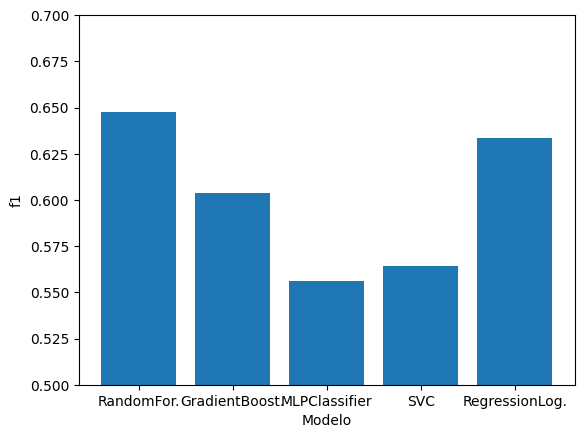

In [11]:
# Graficar resultados
import matplotlib.pyplot as plt
plt.bar(df['Modelo'],df['f1'])
plt.ylim([0.5,0.7])
plt.xlabel('Modelo')
plt.ylabel('f1')
#plt.Title('Comparacion de modelos por f1')
plt.show()

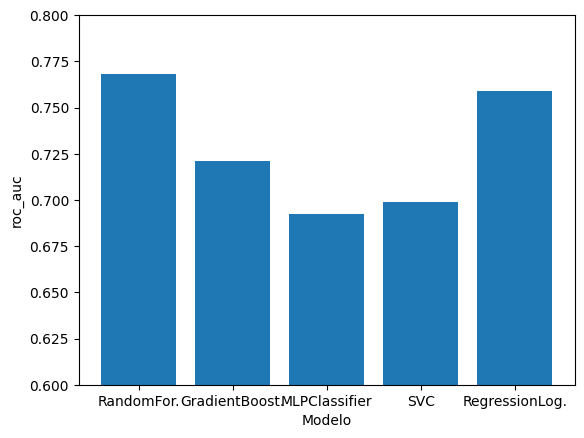

In [12]:
# Graficar resultados
import matplotlib.pyplot as plt
plt.bar(df['Modelo'],df['roc_auc'])
plt.ylim([0.6,0.8])
plt.xlabel('Modelo')
plt.ylabel('roc_auc')
#plt.Title('Comparacion de modelos por roc_auc')
plt.show()

In [13]:
#Calcular la curba ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_predictions)
roc_auc_rf = auc(fpr_rf,tpr_rf)

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_predictions)
roc_auc_gb = auc(fpr_gb,tpr_gb)

fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, mlp_predictions)
roc_auc_mlp = auc(fpr_mlp,tpr_mlp)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_predictions)
roc_auc_svm = auc(fpr_svm,tpr_svm)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_predictions)
roc_auc_lr = auc(fpr_lr,tpr_lr)


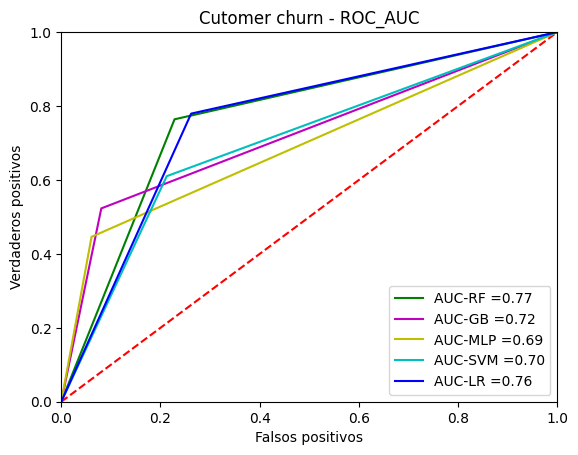

In [14]:
# Plotear grafico

figura = plt.figure()
plt.title('Cutomer churn - ROC_AUC')

plt.plot([0,1], [0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')

plt.plot(fpr_rf,tpr_rf,'g', label='AUC-RF =%0.2f' % roc_auc_rf)
plt.plot(fpr_gb,tpr_gb,'m', label='AUC-GB =%0.2f' % roc_auc_gb)
plt.plot(fpr_mlp,tpr_mlp,'y', label='AUC-MLP =%0.2f' % roc_auc_mlp)
plt.plot(fpr_svm,tpr_svm,'c', label='AUC-SVM =%0.2f' % roc_auc_svm)
plt.plot(fpr_lr,tpr_lr,'b', label='AUC-LR =%0.2f' % roc_auc_lr)

plt.legend(loc='lower right')
disp1 = plt.show()

In [18]:
#Imprimir variables mas relevante en la clasificacion
importances = rf.feature_importances_
df_importance = pd.DataFrame({'variable': X_train.columns, 'importancia': importances})
df_importance = df_importance.sort_values('importancia', ascending=False)
print(df_importance.head(20))

            variable  importancia
14          Contract     0.444594
8     OnlineSecurity     0.126579
4             tenure     0.106969
11       TechSupport     0.092510
17    MonthlyCharges     0.084049
18      TotalCharges     0.057133
7    InternetService     0.036640
13   StreamingMovies     0.010088
9       OnlineBackup     0.009751
16     PaymentMethod     0.008635
12       StreamingTV     0.005723
15  PaperlessBilling     0.004819
10  DeviceProtection     0.002933
5       PhoneService     0.002392
1      SeniorCitizen     0.002285
6      MultipleLines     0.002089
3         Dependents     0.001058
0             gender     0.000975
2            Partner     0.000777


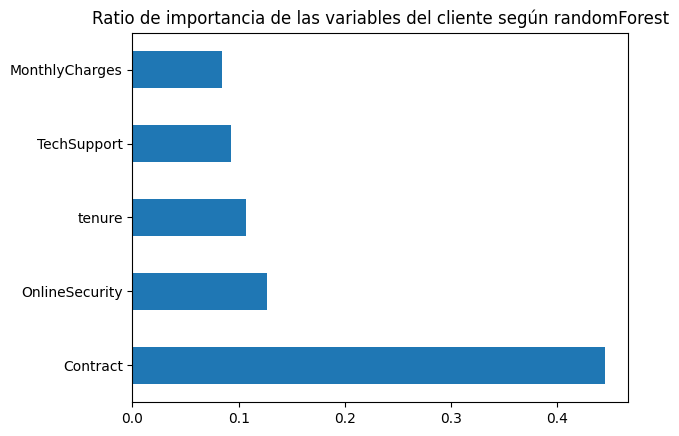

In [20]:
#Se representan las 5 más importantes
(pd.Series(importances,index=X_train.columns).nlargest(5).plot(kind='barh'))
plt.title("Ratio de importancia de las variables del cliente según randomForest")
plt.show()

Coef. independiente: [0.39700124]
Coef. por variable: [[-1.33491629e-02  2.19299462e-01  4.13412715e-02 -1.64108460e-01
  -5.33724763e-02 -1.00714262e+00  5.33443297e-02  2.30488482e-01
  -2.49108591e-01 -1.46704280e-01 -8.00753898e-02 -2.72209623e-01
   2.55833990e-02 -6.10201238e-04 -7.57593087e-01  3.75959719e-01
   5.45246984e-02  2.28240400e-02  2.68024996e-04]]



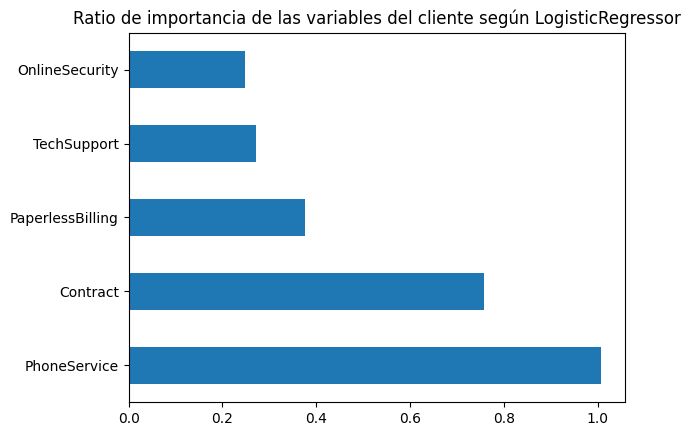

In [19]:
print("Coef. independiente:",lr.intercept_)
print("Coef. por variable:",lr.coef_)
print()
importancia = np.abs(lr.coef_[0]) #transformamos a una lista uni-dimensional
importancia_norm = normalize(importancia[:,np.newaxis],
axis=0).ravel()
#Se representan las 5 más importantes según valor absoluto
(pd.Series(importancia,
index=X_train.columns).nlargest(5).plot(kind='barh'))
plt.title("Ratio de importancia de las variables del cliente según LogisticRegressor")
plt.show()
print()